# __Predicting Airbnb Listing Prices in Sydney__

---

Contributors:
- __Anh Dung Tu__
- __Minh Chau Nguyen__
- __Phan Khanh Linh Do__

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

## Task 1: Problem Description and Initial Data Analysis
- Forecasting Problem
- Evaluation Criteria
- Types of Variables/Features
- Data summary and main data characteristics
- Missing Values (only explain what you found at this stage)
    



#### **Forecasting Problem**
This report focuses on predicting the listing price of Airbnb in Sydney based on the characteristics of listed properties. 
 
#### **Evaluation Criteria**
The price of listed properties is directly associated with criteria such as location, neighborhood, property type and its capacity/ accommodate. For example, bigger accommodation szie with a variety of amenities would have higher price than other properties or the central location would have higher price then further suburb.  

In [2]:
#Task 1 code here, insert more cells if required
## Reading the dataset:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
## Merging the two datasets
df = pd.concat([df_train, df_test], ignore_index = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            10000 non-null  int64  
 1   name                                          9998 non-null   object 
 2   description                                   9846 non-null   object 
 3   neighborhood_overview                         6943 non-null   object 
 4   host_name                                     10000 non-null  object 
 5   host_since                                    10000 non-null  object 
 6   host_location                                 9996 non-null   object 
 7   host_about                                    6110 non-null   object 
 8   host_response_time                            6821 non-null   object 
 9   host_response_rate                            6821 non-null   

#### **Types of Variables/Features**
Most of the variables such as location, property type and neighborhood’s types are objects (strings, text). There are features like `host_reponse_rate`, `host_acceptance_rate` and `price` which contains both numerical and special character. On the other hand, only a few variables such as accommodate, number of night available, number of minimum or maximum nights are integer.

In [4]:
df.describe()

,ID,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,9162.000000,9631.000000,10000.000000,10000.000000,9945.000000,10000.000000,10000.000000,9.945000e+03,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,9933.000000,10000.000000,10000.000000,10000.000000,9420.000000,9149.000000,9155.000000,9148.000000,9156.000000,9148.000000,9146.000000,10000.000000,10000.000000,10000.000000,10000.000000,9420.000000
mean,4999.50000,12.871200,-33.853093,151.194656,3.62980,1.777450,2.171633,43.501700,828.822200,42.506083,43.991300,907.023700,2.376217e+06,43.257400,2.169292e+06,8.106200,20.726000,35.394000,137.551898,28.467700,5.147600,0.547500,4.544779,4.742338,4.623815,4.835223,4.832469,4.831458,4.635984,9.916300,8.151700,1.647800,0.054400,0.797516
std,2886.89568,38.223115,0.087999,0.100407,2.28063,1.070244,1.649610,48.756685,451.594808,48.739458,48.155792,408.469203,7.138470e+07,48.461728,6.548772e+07,10.373673,21.920519,33.900282,137.756841,52.898448,11.161706,1.387637,0.914349,0.489796,0.579326,0.402332,0.418854,0.349528,0.505872,25.341076,23.494082,9.719661,0.638656,1.151838
min,0.00000,0.000000,-34.100680,150.630490,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2499.75000,1.000000,-33.895832,151.167258,2.00000,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.530000,4.700000,4.500000,4.840000,4.840000,4.800000,4.522500,1.000000,1.000000,0.000000,0.000000,0.080000
50%,4999.50000,2.000000,-33.877735,151.212825,3.00000,1.000000,2.000000,7.000000,1125.000000,7.000000,10.000000,1125.000000,1.125000e+03,7.000000,1.125000e+03,2.000000,13.000000,31.000000,88.000000,7.000000,0.000000,0.000000,4.820000,4.900000,4.810000,4.980000,4.990000,4.950000,4.760000,1.000000,1.000000,0.000000,0.000000,0.330000
75%,7499.25000,5.000000,-33.814463,151.261212,4.00000,2.000000,3.000000,90.000000,1125.000000,90.000000,90.000000,1125.000000,1.125000e+03,90.000000,1.125000e+03,14.000000,39.000000,67.000000,286.000000,30.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.980000,4.000000,2.000000,1.000000,0.000000,1.060000
max,9999.00000,457.000000,-33.392670,151.340410,16.00000,18.000000,39.000000,1125.000000,1162.000000,1125.000000,1125.000000,1162.000000,2.147484e+09,1125.000000,2.142625e+09,30.000000,60.000000,90.000000,365.000000,756.000000,280.000000,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,197.000000,197.000000,100.000000,17.000000,24.270000


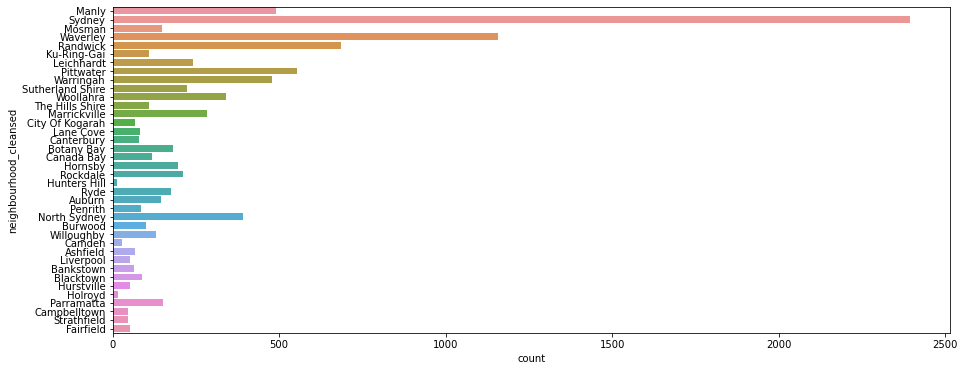

In [5]:
## ploting some features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1, figsize=(15,6))
sns.countplot(y='neighbourhood_cleansed', data = df)
plt.show()

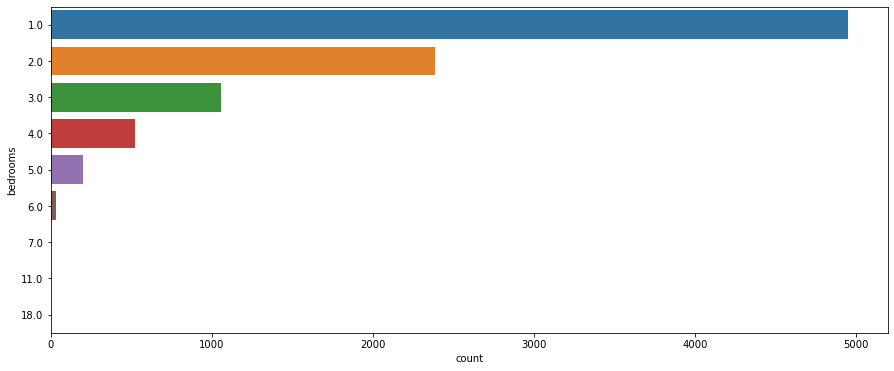

In [6]:
plt.figure(1, figsize=(15,6))
sns.countplot(y='bedrooms', data = df)
plt.show()

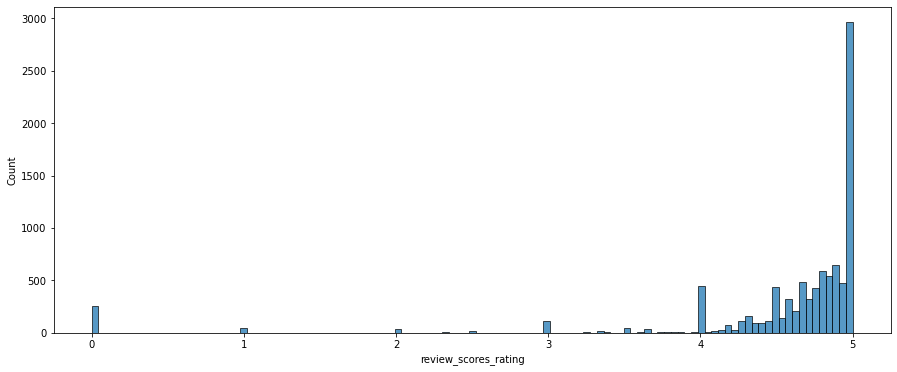

In [7]:
plt.figure(1, figsize=(15,6))
sns.histplot(df['review_scores_rating'])
plt.show()

**Data summary and main data characteristics**
The dataset contains both qualitative and quantitative data. Based on a few features, we can observe that most property types are entire rental units or residential property or private rooms in these properties. Nearly 50% of the properties have one bedroom and one bathroom, suggesting most of the properties are small and suitable for 1 or small group of people. Moreover, all the rating scores for these properties have mean of greater than 4.5/5 which means majority of the properties are good. Based on the last graph of "neighbourhood_cleansed", it is suggested that about 25% of the properties are in Sydney follow by Waverly than Ranwick and other surbubs. Beside that the data set provides a very rich and large range of information about the characteristics of the properties. 
 
**Missing Values**
 About 23% of the data is missing. Most of the missing data is object/ descriptive data such as description of the neighbor, host description and licenses of the place. These data missing mainly due to lack of information provided from the host since they are all self-reported information
 
In task 2, we will clean the data and turn them to readable format for regression model: all the features are converted to nunerical since linear regression doesn't work with string and text data. Also, all the categorial data are encoded to numericcal type by `mapping` or `get_dummies()` function. NaN data need to be removed and imputed before moving to fit the models in task 3.

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering


**Task**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [8]:
## Task 2, Question 1 Code Here
df['host_response_rate']= ((df['host_response_rate'].str.replace("%","")).astype(float))/100
df['host_acceptance_rate']= ((df['host_acceptance_rate'].str.replace("%","")).astype(float))/100
df['price'] = ((df['price'].str.replace("$","")).str.replace(",","")).astype(float)

<ipython-input-8-3a05a1d588e0>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = ((df['price'].str.replace("$","")).str.replace(",","")).astype(float)


**Explanation**

As variables `price`, `host_response_rate` and `host_accepted_rate` contain string data. To convert them to numerical value, `replace` function is used to remove all the special characters like “,” and “$”, and then converted to float. 


**Task:** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `reviews`, `jumio`, etc. from feature `host_verifications`.  


In [9]:
## Task 2 Code
## Determine 5 most-used verification types
for i in ['email', 'phone', 'manual_online', 'facebook', 'reviews', 'manual_offline', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']:
    c = 0
    for index, row in df.iterrows():
        if i in (row["host_verifications"]):
            c +=1
    print('Count of verification type', i, c)

Count of verification type email 9232
Count of verification type phone 9976
Count of verification type manual_online 203
Count of verification type facebook 1428
Count of verification type reviews 6350
Count of verification type manual_offline 213
Count of verification type jumio 6697
Count of verification type offline_government_id 5297
Count of verification type selfie 3262
Count of verification type government_id 7241
Count of verification type identity_manual 3071
Count of verification type work_email 1828


In [10]:
def email_verify(df):
    for i in range(len(df)):
        if 'email' in df['host_verifications']:
            return 1 
        else:
            return 0
def phone_verify(df):
    for i in range(len(df)):
        if 'phone' in df['host_verifications']:
            return 1 
        else:
            return 0
def governmentid_verify(df):
    for i in range(len(df)):
        if 'government_id' in df['host_verifications']:
            return 1 
        else:
            return 0
def jumio_verify(df):
    for i in range(len(df)):
        if 'jumio' in df['host_verifications']:
            return 1 
        else:
            return 0
def reviews_verify(df):
    for i in range(len(df)):
        if 'reviews' in df['host_verifications']:
            return 1 
        else:
            return 0
df['host_email']= df.apply(email_verify, axis = 1)
df['host_phone']= df.apply(phone_verify, axis = 1)
df['host_governmentId']= df.apply(governmentid_verify, axis = 1)
df['host_jumio']= df.apply(jumio_verify, axis = 1)
df['host_reviews']= df.apply(reviews_verify, axis = 1)

In [11]:
for i in ["Clothing storage: wardrobe, walk-in closet, and dresser", "Hot water", "Coffee maker", "Free dryer \\u2013 In building", "Toaster", "Heating", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Private fenced garden or backyard", "Bikes", "Hair dryer", "Conditioner", "Drying rack for clothing", "Babysitter recommendations", "Laundromat nearby", "Fire pit", "Bathtub", "Oven", "Private entrance", "Lockbox", "Beach essentials", "Dedicated workspace: monitor, desk, table, and office chair", "Bread maker", "Ceiling fan", "Microwave", "Iron", "Free washer \\u2013 In building", "68\\ HDTV with Amazon Prime Video, Apple TV, Netflix, standard cable", "Refrigerator", "Outdoor shower", "Board games", "Fire extinguisher", "Hot water kettle", "Piano", "Samsung Bar Bluetooth sound system", "Children\\u2019s dinnerware", "Stove", "Portable fans", "Ethernet connection", "Bed linens", "Game console", "Cable TV", "Hangers", "Pack \\u2019n play/Travel crib", "BBQ grill", "Body soap", "First aid kit", "Smoke alarm", "Room-darkening shades", "Luggage dropoff allowed", "Private patio or balcony", "Essentials", "Cooking basics", "Barbecue utensils", "Baking sheet", "Outdoor furniture", "Outdoor dining area", "Private outdoor saltwater pool", "Wifi", "Free street parking", "Dishwasher", "Freezer", "Nespresso machine", "Dishes and silverware", "Wine glasses", "Cleaning products", "Free parking on premises", "Shampoo", "Shower gel", "Children\\u2019s books and toys", "Kitchen", "Baby safety gates", "High chair", "Rice maker", "Trash compactor", "Mosquito net"]:
    c=0
    for index, row in df.iterrows():
        if i in (row["amenities"]):
            c +=1
    print('Count of amenities type', i, c)

Count of amenities type Clothing storage: wardrobe, walk-in closet, and dresser 3
Count of amenities type Hot water 7143
Count of amenities type Coffee maker 3322
Count of amenities type Free dryer \u2013 In building 56
Count of amenities type Toaster 1401
Count of amenities type Heating 6790
Count of amenities type Long term stays allowed 9301
Count of amenities type Extra pillows and blankets 3623
Count of amenities type Dining table 1333
Count of amenities type Private fenced garden or backyard 402
Count of amenities type Bikes 52
Count of amenities type Hair dryer 7624
Count of amenities type Conditioner 1153
Count of amenities type Drying rack for clothing 993
Count of amenities type Babysitter recommendations 326
Count of amenities type Laundromat nearby 685
Count of amenities type Fire pit 173
Count of amenities type Bathtub 1618
Count of amenities type Oven 4655
Count of amenities type Private entrance 3707
Count of amenities type Lockbox 2639
Count of amenities type Beach esse

In [12]:
def kitchen(df):
    for i in range(len(df)):
        if 'Kitchen' in df['amenities']:
            return 1 
        else:
            return 0
def essential(df):
    for i in range(len(df)):
        if 'Essentials' in df['amenities']:
            return 1 
        else:
            return 0
def smokealarm(df):
    for i in range(len(df)):
        if 'Smoke alarm' in df['amenities']:
            return 1 
        else:
            return 0
def longterm(df):
    for i in range(len(df)):
        if 'Long term stays allowed' in df['amenities']:
            return 1 
        else:
            return 0
def wifi(df):
    for i in range(len(df)):
        if 'Wifi' in df['amenities']:
            return 1 
        else:
            return 0
df['kitchen']= df.apply(kitchen, axis = 1)
df['wifi']= df.apply(wifi, axis = 1)
df['smoke_alarm']= df.apply(smokealarm, axis = 1)
df['longterm_stay']= df.apply(longterm, axis = 1)
df['essentials']= df.apply(essential, axis = 1)

**Explanation** 

Existing features that contain multiple information are `host_verification` and `amenities`. For instance, `host_verification` has email, phone, facebook etc... A loop is created to run to all the values and count the frequency of appearance of items. After that, we define a function such as `email_verify` which takes a parameter as the dataset df. This function will loop through all values in df and if it matches the value ‘email’ in host_verification it will return 1 and o if not. There are 6 new features which are 5 most popular types of verification and `Other` are created. 

Similar method are applied to `amenities`.



**Task**: Impute missing values for all features in both training and test datasets.   

In [13]:
df.isnull().sum()

ID                                                 0
name                                               2
description                                      154
neighborhood_overview                           3057
host_name                                          0
host_since                                         0
host_location                                      4
host_about                                      3890
host_response_time                              3179
host_response_rate                              3179
host_acceptance_rate                            3030
host_is_superhost                                  0
host_neighbourhood                              4175
host_listings_count                                0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   3056
neighbourhood_cleansed                        

In [14]:
# Task 2, Question 3 Code Here
## Impute text/categorical variables with "Unknown"
df[['name','description','neighborhood_overview', 'host_about','host_neighbourhood', 'neighbourhood', 'license',]]=df[['name','description','neighborhood_overview', 'host_about','host_neighbourhood', 'neighbourhood','license']].fillna(value = 'Unknown')
df['host_location']= df['host_location'].fillna(value = 'Australia')

## Impute categorical variables with the most frequent value
mode_values = {"host_response_time": df["host_response_time"].mode()[0],"property_type": df["property_type"].mode()[0], "room_type": df["room_type"].mode()[0],"bathrooms": df["bathrooms"].mode()[0] }
df.fillna(value = mode_values, inplace = True)

# Impute numerical variables
## Using min and max values:
df['minimum_minimum_nights'].fillna(value = df['minimum_minimum_nights'].min(), inplace = True)
df['maximum_maximum_nights'].fillna(value = df['maximum_maximum_nights'].max(), inplace = True)
## Using mean values:
mean_values = {'availability_365': df['availability_365'].mean(),'host_response_rate': df['host_response_rate'].mean(),'host_acceptance_rate': df['host_acceptance_rate'].mean(),"bedrooms":df['bedrooms'].mean(), "beds":df["beds"].mean(),'review_scores_rating':df['review_scores_rating'].mean(), 'review_scores_accuracy':df['review_scores_accuracy'].mean(),'review_scores_cleanliness':df['review_scores_cleanliness'].mean(),'review_scores_checkin':df['review_scores_checkin'].mean(),'review_scores_communication':df['review_scores_communication'].mean(),'review_scores_location':df['review_scores_location'].mean(),'review_scores_value':df['review_scores_value'].mean(),'reviews_per_month':df['reviews_per_month'].mean()}
df.fillna(value = mean_values, inplace = True)

# Impute datetime variables
## Convert type from object to datetime 
df['first_review']= pd.to_datetime(df['first_review'])
df['last_review']= pd.to_datetime(df['last_review'])
## Fill NaN values of the datetime:
df['first_review'].fillna(value = min(df['first_review']), inplace = True)
df['last_review'].fillna(value = max(df['last_review']), inplace = True)

In [15]:
## Impute the missing values in column 'neighbourhood_cleansed' by the suburb of the location
for i in range(len(df)):
    if len(str(df['neighbourhood_cleansed'].loc[i])) == 3:
        df['neighbourhood_cleansed'].loc[i]=df['host_location'].loc[i].split()[0].replace(',', '')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Explanation**

With text/categorical value, such as name of host, description etc.., these description text can’t be converted to numerical value to apply in the regression model. Therefore impute all the missing values with `unknown` as most of these columns will be dropped later as they are not significantly related to the prediction of `price`. 
 
Impute categorical data `Host_respond_time` with most frequent values and `minimum_minimum_nights` and `minimum_minimum_nights` with max and min value in the column respectively. I tried to impute these values with mean but it reduced the accuracy score of the model prediction. “Availability_365” is imputed with mean value. 
 
To impute missing date value,  values in columns ‘first_review” and ‘last_review” is converted from object to datetime, thus it is filled with min value for “first_review” and max value for “last_review”. 

As the `neighbourhood_cleansed` features is used in the model, I extract the suburb of the location to fill in all the missing values in this columns.
 


**Task**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [16]:
sharedBath = ['Shared half-bath','Private half-bath','Half-bath','6 shared baths', '5.5 shared baths', '4.5 shared baths','4 shared baths', '3.5 shared baths', '3 shared baths', '2.5 shared baths','2 shared baths','1.5 shared baths','1 shared bath','7 shared baths']
oneBath = ['1 bath','1 private bath', '1.5 baths']
twoBath = ['2 baths', '2.5 baths']
threeBath = ['3 baths','3.5 baths']
manyBath = ['4 baths','4.5 baths','5 baths',  '5.5 baths','6 baths','6.5 baths', '11 baths', '19 baths']
for i in range(len(df)):
    if df['bathrooms'].loc[i] in sharedBath:
        df['bathrooms'].loc[i]= 'Shared bathrooms'
    if df['bathrooms'].loc[i] in oneBath:
        df['bathrooms'].loc[i]= 'One bathroom'
    if df['bathrooms'].loc[i] in twoBath:
        df['bathrooms'].loc[i]= 'Two bathrooms'
    if df['bathrooms'].loc[i] in threeBath:
        df['bathrooms'].loc[i]= 'Three bathrooms'
    if df['bathrooms'].loc[i] in manyBath:
        df['bathrooms'].loc[i]= 'Many bathrooms'
    if df['bathrooms'].loc[i] not in ['Shared bathrooms','One bathroom','Two bathrooms','Three bathrooms','Many bathrooms']:
        df['bathrooms'].loc[i]= 'Other'

In [17]:
for i in range(len(df)):
    if 'Room' in df['property_type'].loc[i]:
        df['property_type'].loc[i]= 'Entire room'
    if 'Private room' in df['property_type'].loc[i]:
        df['property_type'].loc[i]= 'Private room'
    if 'Shared room' in df['property_type'].loc[i]:
        df['property_type'].loc[i]= 'Shared room'  
entireTownhouse = ['Entire villa', 'Entire residential home','Entire guest suite','Entire guesthouse','Entire bungalow','Tiny house','Entire place','Entire vacation home','Dome house','Earth house','Casa particular']
entireRentalUnit = ['Entire serviced apartment', 'Entire loft', 'Entire rental unit', 'Entire condominium (condo)', 'Entire cottage']
for i in range(len(df)):
    if df['property_type'].loc[i] in entireTownhouse:
        df['property_type'].loc[i]= 'Entire townhouse'
    if df['property_type'].loc[i] in entireRentalUnit:
        df['property_type'].loc[i]= 'Entire rental unit'
        
notOther = ['Entire room', 'Private room','Shared room', 'Entire townhouse','Entire rental unit' ]
for i in range(len(df)):
    if df['property_type'].loc[i] not in notOther:
        df['property_type'].loc[i] = 'Other'

In [18]:
## Mapping the categorical value to numerical
type_map = {'Other':6, 'Entire townhouse':5, 'Entire rental unit':4, 'Entire room':3, 'Private room':2, 'Shared room': 1}
df['property_type_encoded']= df['property_type'].map(type_map)

bath_map = {'Shared bathrooms':0, 'One bathroom':1,'Two bathrooms':2,'Three bathrooms':3, 'Many bathrooms':4, 'Other':5 }
df['bathrooms']= df['bathrooms'].map(bath_map)

room_map = {'Shared room':1, 'Private room': 2, 'Hotel room':3, 'Entire home/apt':4}
df['room_type']= df['room_type'].map(room_map)

repTimeMap = {'within an hour':1, 'within a few hours':2, 'within a day':3, 'a few days or more':4 }
df['host_response_time']= df['host_response_time'].map(repTimeMap)

**Explanation**

Categorical features contain more than 5 unique values are `bathrooms` and `property_type`. We identify the 5 most basic types of these features; for example, with bathrooms, we group all items into 5 suitable groups including 1 bath, 2 bath, 3 bath shared bath and many baths. Value that does not match any value in 5 groups would be assigned as `other`. Similarly with `property_type`.
 
Repeat the renaming process for `Property_type`. Then a mapping function is used to map all the categorical values of `property_type` and `bathroom` into numerical values (from 1 to 6) as these categorical variables are ordinal.

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [19]:
## Encoding True/False values to 1/0
truefalse_map = {'t':1, 'f':0}
df['host_is_superhost'] = df['host_is_superhost'].map(truefalse_map)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map(truefalse_map)
df['host_identity_verified'] = df['host_identity_verified'].map(truefalse_map)
df['has_availability'] = df['has_availability'].map(truefalse_map)
df['instant_bookable'] = df['instant_bookable'].map(truefalse_map)

In [20]:
## Creating location columns for neighbourhood_cleansed
commoncity = ['Sydney','Waverley', 'Randwick','Pittwater','Manly', 'Warringah','North Sydney', 'Woollahra']
for i in range(len(df)):
    if df['neighbourhood_cleansed'].loc[i] not in commoncity:
        df['neighbourhood_cleansed'].loc[i] = 'Other'
## One hot encoding and add these dummies to dataframe
city_onehot = pd.get_dummies(df[['neighbourhood_cleansed']])
df = df.join(city_onehot)
df = df.drop(columns = ['neighbourhood_cleansed'])

In [21]:
#Extract the training and test datasets as the original given datasets
df_training = df.loc[:6999]
df_testing = df.loc[7000:9999]

**Explanation**

The regression model only accepts numeric values, therefore we need to encode other variable values. For instance, `room_type` and `host_response_time` are encoded to numeric values as well as all the features that received true, false values are encoded to 1 and 0 for true and false, respectively. 

Also we get the most popular suburbs in the `neighbourhood_cleansed` columns and map all the values in to these suburbs and `other` by one-hot encoding method. These newly created dummy variables are considered when fitting models.
 
At the start, we merge the training and testing dataset together to clean the whole dataset consistenly. Therefore, to prepare the dataset for model training, we extract the first 7000 rows as the training dataset and the last 3000 rows as the testing dataset for making predictions
 


**Task**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

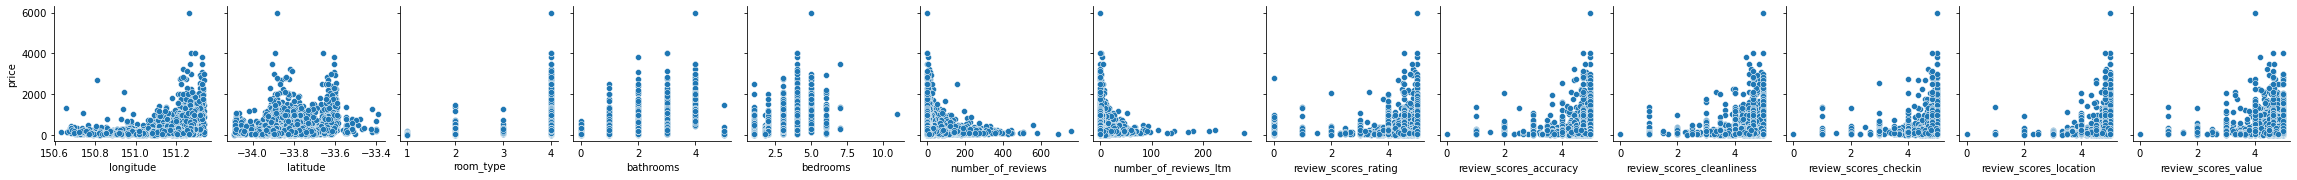

In [22]:
import seaborn as sns
sns.pairplot(data = df, y_vars = ['price'], x_vars = ['longitude','latitude','room_type','bathrooms','bedrooms','number_of_reviews','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness' ,'review_scores_checkin','review_scores_location','review_scores_value'])

<AxesSubplot:>

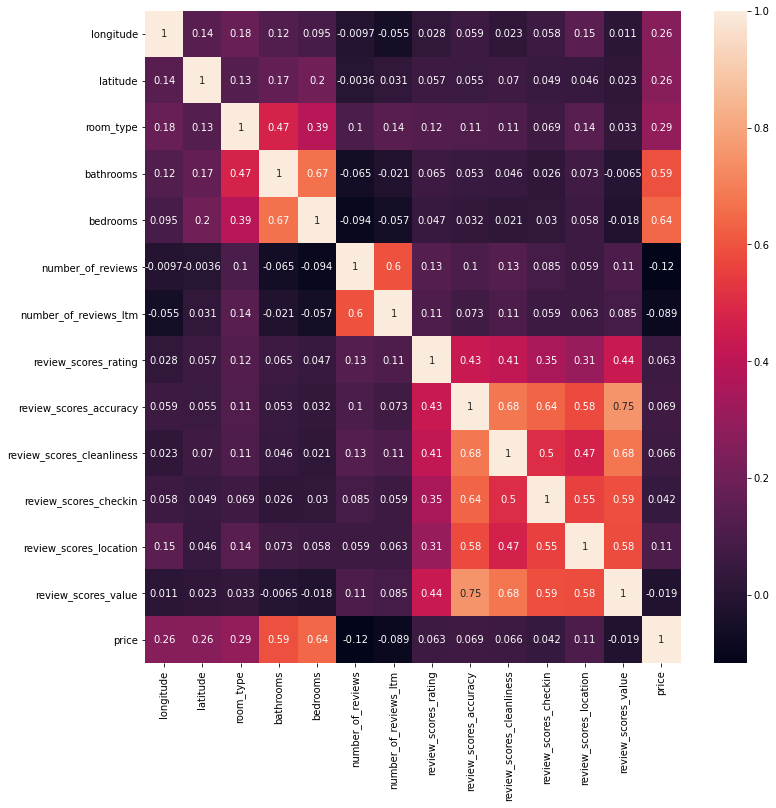

In [23]:
df2 = pd.DataFrame(df, columns =['longitude','latitude','room_type','bathrooms','bedrooms','number_of_reviews','number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_cleanliness' ,'review_scores_checkin','review_scores_location','review_scores_value', 'price'] )
corr2 = df2.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr2, annot = True)

### Comment
As can be seen from the correlation heatmap and the pairplot, our target variable 'price' has a relationship with number of bathrooms and bedrooms. Other variables show no significant relationship with 'price'. To improve the performance of models, these features will be standardized before modelling.


--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly


### Multiple Linear Regression model

We first use linear regression to fit the model to find relation relationships between target and features. Target is `price`. Independent variables are all the numerical variables. All the irrelevant columns are dropped from the X_train set (such as ID, host's personal information: name, location,...) As the regression model cannot process text, the features containing text and string are also removed.
After fitting the Multiple Linear model on  the train data, a low R-squared score of 0.53 is recorded, indicating that this model does not have a good performance on the given dataset. Thus, non-linear models are taken into consideration.

In [24]:
#Task 3 code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


y_train = df_training['price']
X_train = df_training.drop(columns = ['ID','price','name','description','neighborhood_overview','host_name','host_since','host_location', 'host_about','host_verifications','host_neighbourhood', 'neighbourhood','first_review', 'last_review', 'property_type', 'amenities', 'license'])

lr = LinearRegression()
lr.fit(X_train, y_train)
scores_lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10, n_jobs=1)

# print(scores_v2)

print(f'CV accuracy scores\n {scores_lr.reshape(-1,1)}')
print(f'CV accuracy: {np.mean(scores_lr):.3f} +/- {np.std(scores_lr):.3f}')

CV accuracy scores
 [[0.56988956]
 [0.66585995]
 [0.60404365]
 [0.59813026]
 [0.48561318]
 [0.49159468]
 [0.45946647]
 [0.60746764]
 [0.4280117 ]
 [0.40565235]]
CV accuracy: 0.532 +/- 0.084


## **Non-linear model**
Here, we will fit two models: Random Forest Regression and Bagging Regression.
Hyperparameters tuning is also done for both models via cross validation to get the best parameters. The model which records a better result will be used to make the prediction.

### Random Forest Regressor model

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)


print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}')

MSE train: 5043.951
R^2 train: 0.956


### Hyperparameter Tuning - Random Forest

In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(50,300,50)]
# Number of features to consider at every split
max_features = [int(x) for x in range(15,35)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
# Ouput the best params
rf_random.best_params_

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 150, 'max_features': 15, 'max_depth': 10, 'bootstrap': False}

### Fitting model and Hyperparameters Tuning - Bagging Regressor

In [27]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(X_train, y_train)

y_train_pred = br.predict(X_train)
print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}')

MSE train: 7361.169
R^2 train: 0.936


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(50,300,50)]
# Number of features to consider at every split
max_features = [int(x) for x in range(15,35)]
# Maximum number of levels in tree
max_samples = [int(x) for x in np.linspace(10, 110, num = 11)]
max_samples.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
              'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
bg = BaggingRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
bg_random = RandomizedSearchCV(estimator = bg, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
bg_random.fit(X_train, y_train)
# output the best params
bg_random.best_params_

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'max_samples': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.53292905        nan 0.4711552  0.42228728 0.26990375 0.46323444
 0.36734045 0.24742634 0.48403306 0.44354092]
  warnings.warn(


{'n_estimators': 100, 'max_samples': 90, 'max_features': 32, 'bootstrap': True}

As above, the results of Random Forest Regressiom are better with R_squared of 0.959 shows 95% of the variance of dependent variable Price is explained by the independent variables, hence this is a good fit of the data. Whereas, the Bagging Regressor shows worse performance than Random Forest Regressor: significantly higher MSE and lower R2 scores.



## **Output prediction on 3000 entry dataset**

### Choosing the right model
As from the results above, the best model we have used is RandomForestRegressor with the hyperparameters: `n_estimators= 150`, `criterion='mse'`, `max_features= 22`, `max_depth= 20`,`random_state=14`, `bootstrap= True`, `n_jobs=-1`

#### Fitting the finalised model:

In [31]:
## Fitting model
forest = RandomForestRegressor(n_estimators= 150, criterion='mse', max_features= 22, max_depth= 20,random_state=14, bootstrap= True, n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=21, n_estimators=150,
                      n_jobs=-1, random_state=14)

#### Apply to the testing data and output to CSV

In [38]:
# Apply the model to testing dataset
X_test = df_testing.drop(columns = ['ID','price','name','description','neighborhood_overview','host_name','host_since','host_location', 'host_about','host_verifications','host_neighbourhood', 'neighbourhood','first_review', 'last_review', 'property_type', 'amenities', 'license'])

predictprice = forest.predict(X_test)
df_testing['price'] = predictprice
## Output to CSV file
df_testing[['ID', 'price']].to_csv('submission.csv', index = False)

<ipython-input-38-a10e40f3f875>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing['price'] = predictprice


## Kaggle Competition Result

### Ranking and score: 
Highest Rank: 15th

<img src="ranking.png" />

### Comment:
We have tried to fitting more models and tuning them to get the best prediction. However, there seems to be some error in the model when apply it to the testing dataset. We believe that this error coming from Feature Engineering and Hyperparameters Tuning. In the future, we will try to find out method to fix this problem and improve the better prediction. 